In [8]:
# 导入需要的模块
# 若无相关module, 可以在jupyter note中可以 ! pip install <模块名>
import requests
import re
import numpy as np
import pandas as pd
import matplotlib as plt
from bs4 import BeautifulSoup
import datetime
import backtrader as bt
import pandas as pd
import yfinance as yf
import pandas as pd
import akshare as ak
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
def cum_returns(group):
    group['cum_returns']=(1+(group['涨跌幅']/100)).cumprod()
    return group['cum_returns'].iloc[-1]
def returns_result(ticker): 
    df_300 = ak.index_zh_a_hist(symbol=ticker, period="daily")
    df_300['日期']=pd.to_datetime(df_300['日期'])
    df_300['weekday']=df_300['日期'].dt.weekday
    df_result = pd.DataFrame(df_300[['weekday','涨跌幅']].groupby('weekday').apply(cum_returns))
    df_result.columns=['累积涨跌幅（%）']
    df_result = round((df_result - 1)*100,2)
    df_result.sort_values(by=['weekday'],ascending=True)
    return df_result

def returns_plot(df_result):
    fig = px.bar(df_result, x='累积涨跌幅（%）', y=df_result.index.astype('str'), title=ticker+'_Cumulative Returns',
                 color_continuous_scale=px.colors.sequential.Plotly3[::-1],color='累积涨跌幅（%）')
    
    # Add data labels to the bars
    fig.update_traces(text=df_result['累积涨跌幅（%）'].astype('str'))
    # 更改小于0的条形颜色为红色
    
    # 显示图表
    fig.show()

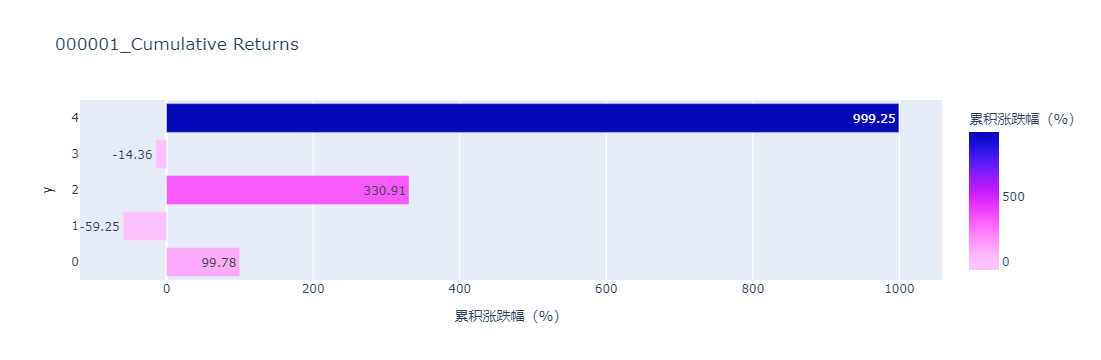

None


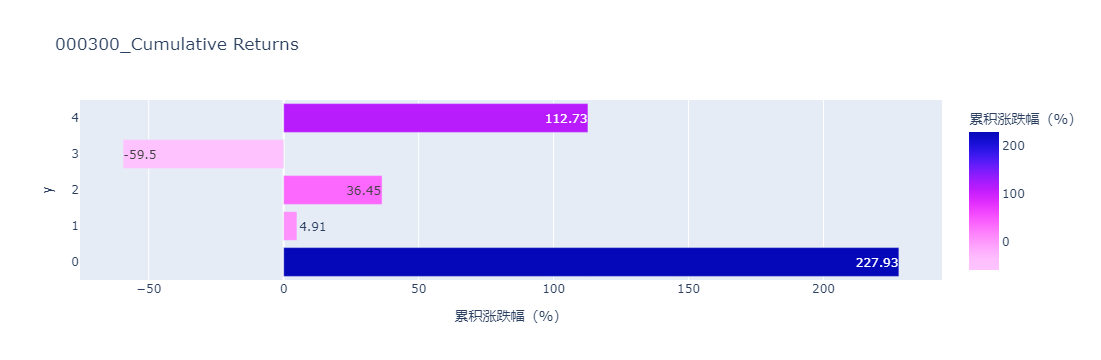

None


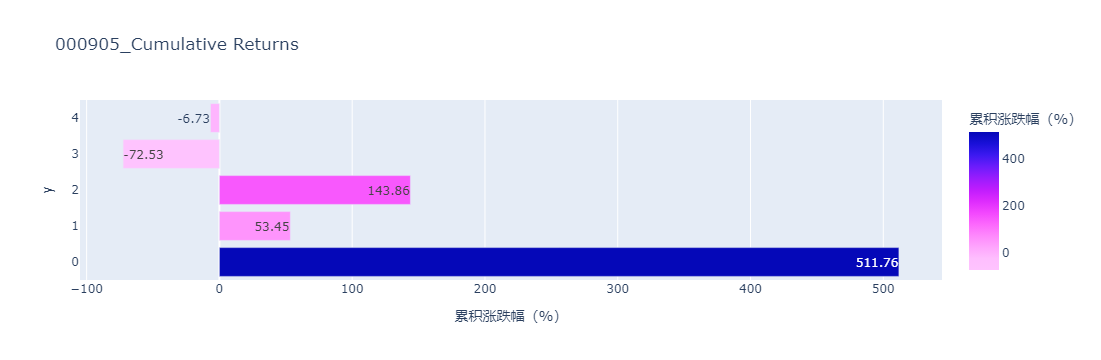

None


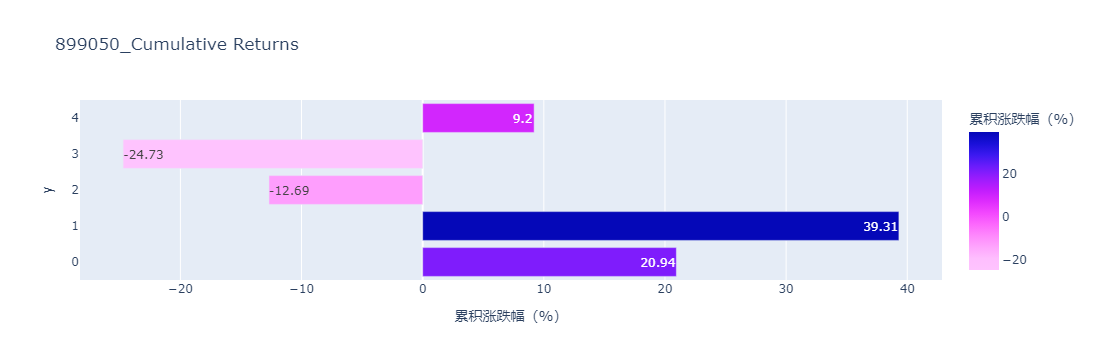

None


In [9]:
# '000001','000300','000905','899050'
tickers=['000001','000300','000905','899050']
for ticker in tickers: 
    print(returns_plot(returns_result(ticker)))

C:\Users\wenyuan\AppData\Local\Temp\ipykernel_16296\2212686146.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_result = pd.DataFrame(df_300[['weekday','涨跌幅']].groupby('weekday').apply(cum_returns))


,累积涨跌幅（%）
weekday,
0,99.78
1,-59.25
2,330.91
3,-14.36
4,999.25


In [9]:
!pip install plotly

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
     -------- ------------------------------- 4.2/19.1 MB 27.9 MB/s eta 0:00:01
     --------------------------------------- 19.1/19.1 MB 52.2 MB/s eta 0:00:00


ModuleNotFoundError: No module named 'plotly'